# TME 5

### Youcef Benslimane et Maximilien Nowak Abdallah

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mltools import plot_data, plot_frontiere, make_grid, gen_arti
import sklearn
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.svm import SVC, LinearSVC
from sklearn.pipeline import *
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.exceptions import ConvergenceWarning
import sklearn.svm as svm


In [2]:
def load_usps(fn):
    with open(fn,"r") as f:
        f.readline()
        data = [[float(x) for x in l.split()] for l in f if len(l.split())>2]
    tmp=np.array(data)
    return tmp[:,1:],tmp[:,0].astype(int)

def get_usps(l,datax,datay):
    if type(l)!=list:
        resx = datax[datay==l,:]
        resy = datay[datay==l]
        return resx,resy
    tmp =   list(zip(*[get_usps(i,datax,datay) for i in l]))
    tmpx,tmpy = np.vstack(tmp[0]),np.hstack(tmp[1])
    return tmpx,tmpy

def show_usps(data):
    plt.imshow(data.reshape((16,16)),interpolation="nearest",cmap="gray")

In [3]:
if __name__ =="__main__":
    uspsdatatrain = "data/USPS_train.txt"
    uspsdatatest = "data/USPS_test.txt"
    alltrainx,alltrainy = load_usps(uspsdatatrain)
    alltestx,alltesty = load_usps(uspsdatatest)
    neg = 5
    pos = 6
    datax,datay = get_usps([neg,pos],alltrainx,alltrainy)
    testx,testy = get_usps([neg,pos],alltestx,alltesty)

In [4]:
def perceptron_loss(w, x, y):
    return np.maximum(0,-y*np.dot(x,w))

def perceptron_grad(w, x, y):
    m = np.sign(np.maximum(0,-y*np.dot(x, w)))
    return np.mean(m*(-y*x),axis=0).reshape(-1,1)

In [5]:
class Lineaire(object):
    def __init__(self,loss=perceptron_loss,loss_g=perceptron_grad,max_iter=100,eps=0.01, proj = None):
        self.max_iter, self.eps = max_iter,eps
        self.w = None
        self.loss,self.loss_g = loss,loss_g
        self.proj = proj

        
    def fit(self,datax,datay,testX, testY):
        #after adding the projection functions
        if(self.proj!=None):
            datax = self.proj(datax)
        datay = datay.reshape(-1, 1)
        N = datax.shape[1]
        self.w = np.random.rand(N,1)
        #print(self.w.shape)
        costs = []
        costs_test = []
        for i in range(self.max_iter):
            costs+=[self.loss(self.w,datax,datay).mean()]
            costs_test+=[self.loss(self.w, testX, testY).mean()]
            gradient = self.loss_g(self.w,datax,datay)
            #print(gradient.shape)
            self.w = self.w - self.eps * gradient
            #print(self.w.shape)

            
        return self.w, costs, costs_test
    

    def predict(self,dataX):
        if len(dataX.shape)==1:
            dataX = dataX.reshape(1,-1)
        return np.sign(np.dot(dataX,self.w)).reshape(-1)

    def score(self,datax,datay):
        return np.mean(self.predict(datax) == datay)
    

In [6]:
def  plot_frontiere_proba ( data , f , step =20):
    grid , x , y=make_grid ( data=data , step=step )
    plt.contourf (x , y , f(grid).reshape (x . shape ) ,255)
    plot_frontiere_proba ( data , lambda x :  svm.predict_proba(x)[:,0] , step =50)

In [7]:
neg = 9
pos = 6
datax,datay = get_usps([neg,pos],alltrainx,alltrainy)
testx,testy = get_usps([neg,pos],alltestx,alltesty)
datay = np.where(datay==neg,-1,1)

In [8]:
perceptron = Lineaire(max_iter=1000,eps=0.01)
perceptron.fit(datax,datay,testx,testy)
score = perceptron.score(datax,datay)
print("Score (présicion) avec notre Perceptron : ", score)

clf = sklearn.linear_model.Perceptron(alpha = 0.01)
clf.fit(datax, datay)
score = cross_val_score(clf, datax, datay, cv=5, scoring='accuracy')
print("Score présicion) en validation croisée avec sklearn :", np.mean(score))

Score (présicion) avec notre Perceptron :  0.9801223241590215
Score présicion) en validation croisée avec sklearn : 0.9984732824427482


# SVM et Grid Search

## Linear

In [9]:
trainx, trainy = gen_arti(data_type = 0, epsilon=0.4)
testx, testy = gen_arti(data_type = 0, epsilon=0.4)

Accuracy : train 0.998000, test 0.998000
[ 9 10]


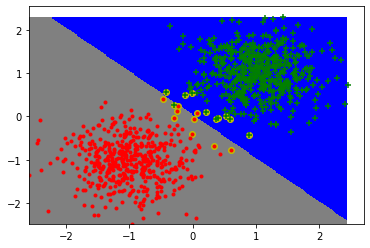

In [10]:
svm_sci = svm.SVC(kernel = "linear")

svm_sci.fit(trainx, trainy)
print("Accuracy : train %f, test %f"% (svm_sci.score(trainx,trainy),svm_sci.score(testx,testy)))
print(svm_sci.n_support_)
plt.figure()
plot_frontiere(trainx, svm_sci.predict, 200)
plt.scatter(svm_sci.support_vectors_[:, 0], svm_sci.support_vectors_[:, 1], c="y")
plot_data(trainx,trainy)

In [11]:
trainx, trainy = gen_arti(data_type = 1, epsilon=0.4)
testx, testy = gen_arti(data_type = 1, epsilon=0.4)

Accuracy : train 0.563000, test 0.564000
[496 496]


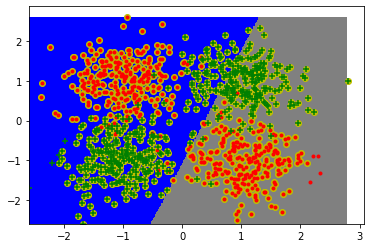

In [12]:
svm_sci = svm.SVC(kernel = "linear")

svm_sci.fit(trainx, trainy)
print("Accuracy : train %f, test %f"% (svm_sci.score(trainx,trainy),svm_sci.score(testx,testy)))
print(svm_sci.n_support_)
plt.figure()
plot_frontiere(trainx, svm_sci.predict, 200)
plt.scatter(svm_sci.support_vectors_[:, 0], svm_sci.support_vectors_[:, 1], c="y")
plot_data(trainx,trainy)

In [13]:
trainx, trainy = gen_arti(data_type = 2, epsilon=0.4)
testx, testy = gen_arti(data_type = 2, epsilon=0.4)

Accuracy : train 0.524000, test 0.469000
[490 476]


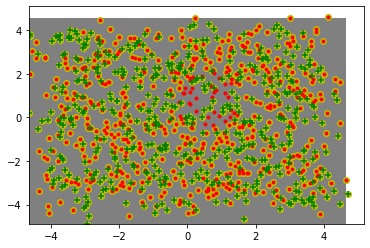

In [14]:
svm_sci = svm.SVC(kernel = "linear")

svm_sci.fit(trainx, trainy)
print("Accuracy : train %f, test %f"% (svm_sci.score(trainx,trainy),svm_sci.score(testx,testy)))
print(svm_sci.n_support_)
plt.figure()
plot_frontiere(trainx, svm_sci.predict, 200)
plt.scatter(svm_sci.support_vectors_[:, 0], svm_sci.support_vectors_[:, 1], c="y")
plot_data(trainx,trainy)

## gaussien

In [15]:
trainx, trainy = gen_arti(data_type = 0, epsilon=0.4)
testx, testy = gen_arti(data_type = 0, epsilon=0.4)

Accuracy : train 0.999000, test 0.999000
[39 40]


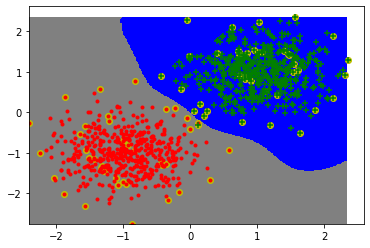

In [16]:
svm_sci = svm.SVC(kernel = "rbf", gamma = 3)

svm_sci.fit(trainx, trainy)
print("Accuracy : train %f, test %f"% (svm_sci.score(trainx,trainy),svm_sci.score(testx,testy)))
print(svm_sci.n_support_)
plt.figure()
plot_frontiere(trainx, svm_sci.predict, 200)
plt.scatter(svm_sci.support_vectors_[:, 0], svm_sci.support_vectors_[:, 1], c="y")
plot_data(trainx,trainy)

In [17]:
trainx, trainy = gen_arti(data_type = 1, epsilon=0.4)
testx, testy = gen_arti(data_type = 1, epsilon=0.4)

Accuracy : train 0.957000, test 0.948000
[138 130]


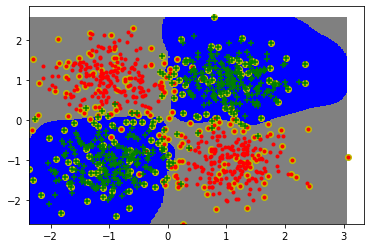

In [18]:
svm_sci = svm.SVC(kernel = "rbf", gamma = 6)

svm_sci.fit(trainx, trainy)
print("Accuracy : train %f, test %f"% (svm_sci.score(trainx,trainy),svm_sci.score(testx,testy)))
print(svm_sci.n_support_)
plt.figure()
plot_frontiere(trainx, svm_sci.predict, 200)
plt.scatter(svm_sci.support_vectors_[:, 0], svm_sci.support_vectors_[:, 1], c="y")
plot_data(trainx,trainy)

In [19]:
trainx, trainy = gen_arti(data_type = 2, epsilon=0.1)
testx, testy = gen_arti(data_type = 2, epsilon=0.1)

Accuracy : train 0.923000, test 0.803000
[328 318]


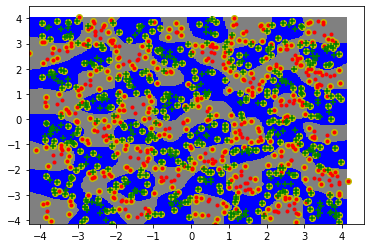

In [20]:
svm_sci = svm.SVC(kernel = "rbf", gamma = 7)

svm_sci.fit(trainx, trainy)
print("Accuracy : train %f, test %f"% (svm_sci.score(trainx,trainy),svm_sci.score(testx,testy)))
print(svm_sci.n_support_)
plt.figure()
plot_frontiere(trainx, svm_sci.predict, 200)
plt.scatter(svm_sci.support_vectors_[:, 0], svm_sci.support_vectors_[:, 1], c="y")
plot_data(trainx,trainy)

## Polynomial

In [21]:
trainx, trainy = gen_arti(data_type = 0, epsilon=0.4)
testx, testy = gen_arti(data_type = 0, epsilon=0.4)

Accuracy : train 0.990000, test 0.992000
[58 58]


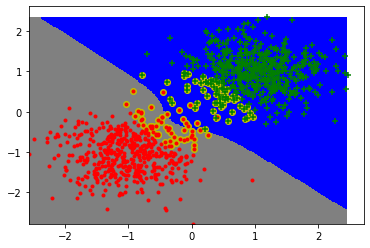

In [22]:
svm_sci = svm.SVC(kernel = "poly", degree = 3)

svm_sci.fit(trainx, trainy)
print("Accuracy : train %f, test %f"% (svm_sci.score(trainx,trainy),svm_sci.score(testx,testy)))
print(svm_sci.n_support_)
plt.figure()
plot_frontiere(trainx, svm_sci.predict, 200)
plt.scatter(svm_sci.support_vectors_[:, 0], svm_sci.support_vectors_[:, 1], c="y")
plot_data(trainx,trainy)

In [23]:
trainx, trainy = gen_arti(data_type = 1, epsilon=0.4)
testx, testy = gen_arti(data_type = 1, epsilon=0.4)

Accuracy : train 0.959000, test 0.949000
[81 81]


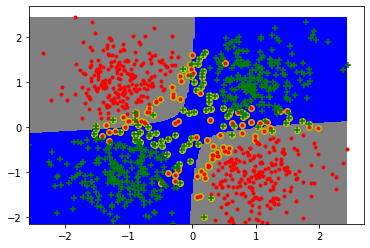

In [24]:
svm_sci = svm.SVC(kernel = "poly", degree = 2)

svm_sci.fit(trainx, trainy)
print("Accuracy : train %f, test %f"% (svm_sci.score(trainx,trainy),svm_sci.score(testx,testy)))
print(svm_sci.n_support_)
plt.figure()
plot_frontiere(trainx, svm_sci.predict, 200)
plt.scatter(svm_sci.support_vectors_[:, 0], svm_sci.support_vectors_[:, 1], c="y")
plot_data(trainx,trainy)

In [25]:
trainx, trainy = gen_arti(data_type = 2, epsilon=0.4)
testx, testy = gen_arti(data_type = 2, epsilon=0.4)

Accuracy : train 0.529000, test 0.508000
[479 482]


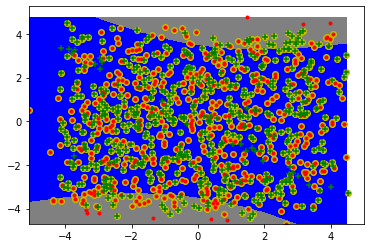

In [26]:
svm_sci = svm.SVC(kernel = "poly", degree = 4)

svm_sci.fit(trainx, trainy)
print("Accuracy : train %f, test %f"% (svm_sci.score(trainx,trainy),svm_sci.score(testx,testy)))
print(svm_sci.n_support_)
plt.figure()
plot_frontiere(trainx, svm_sci.predict, 200)
plt.scatter(svm_sci.support_vectors_[:, 0], svm_sci.support_vectors_[:, 1], c="y")
plot_data(trainx,trainy)

On remarque pour les 3 noyaux que plus le paramètre α est grand plus le nombre de vecteur support est grand, en effet α est la constante de l’écart à la marge accepté par le SVM donc plus elle est grande, plus le nombre de points dans la marge sera important et donc plus les points auront une importance dans la décision de la frontière, cela est du aux conditions d’optimalitées KKT. Le degrès n’est important que pour le noyau polynomial et on remarque bien que plus le degrès est élevé moins le séparateur est linéaire, en effet on augmente la dimensionalité.

## Validation croisée 

## Gaussien

In [27]:
trainx, trainy = gen_arti(data_type = 2, epsilon=0.1)
testx, testy = gen_arti(data_type = 2, epsilon=0.1)

In [28]:
# C à quel point je veux forcer le modèle à séparer les données linéairement
all_params_adm = {
        'C': [0.5, 1.0, 2.0, 10, 100, 1000],
        'degree': [3, 4, 5, 6, 7, 8],
        'gamma': ['auto', 'scale', 1.0, 2, 3, 4, 5, 6, 7, 8],
        'coef0': [-1.0, 0.0, 1.0],
        'shrinking': [True, False],
        'probability': [True, False]
    }

In [29]:
gammas = {'gamma':[10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0.1]}

svm_sci = svm.SVC(kernel = "rbf")

clf = GridSearchCV(svm_sci, all_params_adm, verbose=1)
clf.fit(trainx, trainy)
print(clf.best_params_)

Fitting 5 folds for each of 4320 candidates, totalling 21600 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'C': 10, 'coef0': -1.0, 'degree': 3, 'gamma': 3, 'probability': True, 'shrinking': True}


[Parallel(n_jobs=1)]: Done 21600 out of 21600 | elapsed: 44.8min finished


Accuracy : train 0.928000, test 0.810000
[223 209]


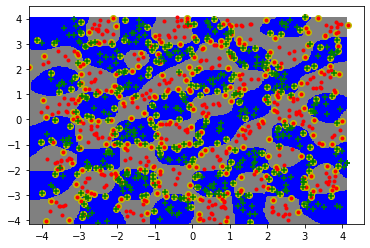

In [30]:
svm_sci = svm.SVC(kernel = "rbf", **clf.best_params_)

svm_sci.fit(trainx, trainy)
print("Accuracy : train %f, test %f"% (svm_sci.score(trainx,trainy),svm_sci.score(testx,testy)))
print(svm_sci.n_support_)
plt.figure()
plot_frontiere(trainx, svm_sci.predict, 200)
plt.scatter(svm_sci.support_vectors_[:, 0], svm_sci.support_vectors_[:, 1], c="y")
plot_data(trainx,trainy)

On remarque qu'on a un résultat meilleur que le précédent.

## Polynomial

In [31]:
all_params_adm = {
        'C': [0.5, 1.0, 2.0, 10, 100, 1000],
        'degree': [3, 4, 5, 6, 7, 8],
        'coef0': [-1.0, 0.0, 1.0],
        'shrinking': [True, False],
        'probability': [True, False]
    }

In [32]:
trainx, trainy = gen_arti(data_type = 1, epsilon=0.1)
testx, testy = gen_arti(data_type = 1, epsilon=0.1)

#degrees = {'degree':[10, 9, 8, 7, 6, 5, 4, 3, 2, 1]}

svm_sci = svm.SVC(kernel = "poly")

clf = GridSearchCV(svm_sci, all_params_adm, verbose=1)
clf.fit(trainx, trainy)
print(clf.best_params_)

Accuracy : train 0.999000, test 0.996000
[13 14]


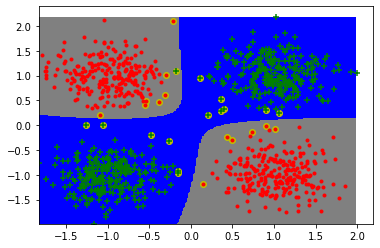

In [34]:
svm_sci = svm.SVC(kernel = "poly", **clf.best_params_)

svm_sci.fit(trainx, trainy)
print("Accuracy : train %f, test %f"% (svm_sci.score(trainx,trainy),svm_sci.score(testx,testy)))
print(svm_sci.n_support_)
plt.figure()
plot_frontiere(trainx, svm_sci.predict, 200)
plt.scatter(svm_sci.support_vectors_[:, 0], svm_sci.support_vectors_[:, 1], c="y")
plot_data(trainx,trainy)

On remarque que les frontières sont beaucoup plus précises.